<a href="https://colab.research.google.com/github/subarna007/Data-Science/blob/main/Text%20Classification%20of%20BBC%20Tech%20News%20Articles%20using%20Naive%20Bayes%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Apple Mac Creator Dies.txt to Apple Mac Creator Dies.txt
Saving argonaut_games_revival.txt to argonaut_games_revival.txt
Saving Art Search Technology.txt to Art Search Technology.txt
Saving BBC Interactive Bafta Wins.txt to BBC Interactive Bafta Wins.txt
Saving Blog Popularity in the US.txt to Blog Popularity in the US.txt
Saving bush_site_geo_block.txt to bush_site_geo_block.txt
Saving christmas_gadget_trends.txt to christmas_gadget_trends.txt
Saving Color-to-Music Software.txt to Color-to-Music Software.txt
Saving decline_of_home_phones.txt to decline_of_home_phones.txt
Saving doom_3_golden_joystick.txt to doom_3_golden_joystick.txt
Saving Employee Monitoring Software.txt to Employee Monitoring Software.txt
Saving EU Software Laws Delay.txt to EU Software Laws Delay.txt
Saving Half-Life 2 Bafta Awards.txt to Half-Life 2 Bafta Awards.txt
Saving high_definition_dvd.txt to high_definition_dvd.txt
Saving id_fraud_shadowcrew_arrests.txt to id_fraud_shadowcrew_arrests.txt
Saving Int

In [2]:
# Map filenames to categories
label_map = {
    # Computers / Software
    "Apple Mac Creator Dies.txt": "Computers",
    "argonaut_games_revival.txt": "Games",
    "BBC Interactive Bafta Wins.txt": "Media",
    "doom_3_golden_joystick.txt": "Games",
    "Half-Life 2 Bafta Awards.txt": "Games",
    "Microsoft Anti-Piracy Move.txt": "Security",
    "Microsoft Search Engine.txt": "Internet",
    "Microsoft Word Security Warning.txt": "Security",
    "microsoft_google_search_war.txt": "Internet",
    "high_definition_dvd.txt": "Media",
    "EU Software Laws Delay.txt": "Computers",

    # Internet / Web
    "Art Search Technology.txt": "Media",
    "Blog Popularity in the US.txt": "Internet",
    "bush_site_geo_block.txt": "Internet",
    "Internet Regulation Debate.txt": "Internet",
    "new_internet_domains.txt": "Internet",
    "Search Engine Habits.txt": "Internet",
    "tsunami_aid_online_donations.txt": "Internet",

    # Gadgets / Mobile
    "christmas_gadget_trends.txt": "Gadgets",
    "Color-to-Music Software.txt": "Gadgets",
    "decline_of_home_phones.txt": "Gadgets",
    "Mobile Phone Chip.txt": "Gadgets",
    "mobile_games_evolution.txt": "Games",
    "Motion-Sensitive Mobile Phone.txt": "Gadgets",
    "MP3 Players in the US.txt": "Gadgets",
    "robot_social_behavior.txt": "Gadgets",
    "tv_loyalty_cards.txt": "Gadgets",
    "Xbox 2 Unveiling.txt": "Games",
    "Sony PSP.txt": "Games",
    "Nintendo DS Launch.txt": "Games",
    "ps2_slim_sales_boom.txt": "Games",
    "tech_trends_2005.txt": "Gadgets",

    # Security
    "id_fraud_shadowcrew_arrests.txt": "Security",
    "movie_piracy_parental_software.txt": "Security",
    "napster_lawsuit_norway.txt": "Security",
    "windows_atm_virus_risk.txt": "Security",

    # Media / Entertainment
    "spanish_rap_radio.txt": "Media",
    "Sports Games Rivalry.txt": "Games",
    "star_wars_battlefront_review.txt": "Games"
}


# Loading Data With Labels

In [4]:
import os
import pandas as pd

folder = "" # Removed "bbc_tech" since files are in the current directory
data = []

for fname in os.listdir(folder if folder else '.'): # Iterate over current directory if folder is empty
    if fname in label_map:  # only process known files
        with open(os.path.join(folder, fname) if folder else fname, "r", encoding="utf-8") as f: # Read files from current directory
            text = f.read()
        data.append({"text": text, "label": label_map[fname]})

df = pd.DataFrame(data)
print(df.head())

                                                text     label
0  Dozens held over ID fraud site\n\nTwenty-eight...  Security
1  Net regulation 'still possible'\n\nThe blurrin...  Internet
2  Microsoft launches its own search\n\nMicrosoft...  Internet
3  Warning over Windows Word files\n\nWriting a M...  Security
4  The future in your pocket\n\nIf you are a geek...   Gadgets


# Step 1 — Quick data checks

In [5]:
print("Total docs:", len(df))
print(df.head())

# Class distribution
print(df['label'].value_counts())

display(df.sample(3))


Total docs: 39
                                                text     label
0  Dozens held over ID fraud site\n\nTwenty-eight...  Security
1  Net regulation 'still possible'\n\nThe blurrin...  Internet
2  Microsoft launches its own search\n\nMicrosoft...  Internet
3  Warning over Windows Word files\n\nWriting a M...  Security
4  The future in your pocket\n\nIf you are a geek...   Gadgets
label
Games        10
Gadgets       9
Internet      8
Security      6
Media         4
Computers     2
Name: count, dtype: int64


,text,label
3,Warning over Windows Word files\n\nWriting a M...,Security
21,New delay hits EU software laws\n\nA fresh del...,Computers
18,Moving mobile improves golf swing\n\nA mobile ...,Gadgets


# Step 2 — Preprocessing

In [6]:
import re

def clean_text(s):
    s = s.lower()
    s = re.sub(r'\s+', ' ', s)          # normalize whitespace
    s = re.sub(r'http\S+','', s)        # removing urls
    return s.strip()

df['text'] = df['text'].astype(str).apply(clean_text)


# Step 3 — Train / Test split

In [7]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 4 — Vectorization (TF-IDF)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=1)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)


# Step 5 — Training the Naive Bayes model

In [9]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=1.0)   # alpha smoothing
clf.fit(X_train_vec, y_train)


MultinomialNB()

# Step 6 — Evaluate the model (report + confusion matrix)

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

     Gadgets       1.00      1.00      1.00         2
       Games       0.50      1.00      0.67         2
    Internet       1.00      1.00      1.00         2
       Media       0.00      0.00      0.00         1
    Security       0.00      0.00      0.00         1

    accuracy                           0.75         8
   macro avg       0.50      0.60      0.53         8
weighted avg       0.62      0.75      0.67         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


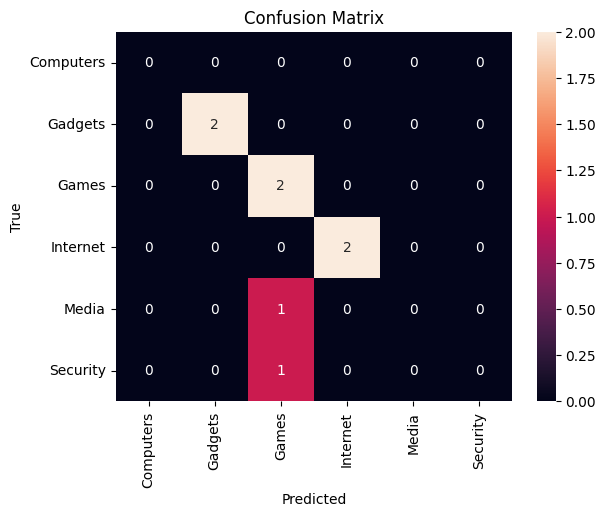

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = clf.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Step 7 — Robust evaluation: k-fold (stratified) cross-validation

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english', min_df=1),
    MultinomialNB(alpha=1.0)
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, df['text'], df['label'], cv=cv, scoring='f1_macro')
print("5-fold F1-macro scores:", scores)
print("Mean F1-macro:", np.mean(scores))


5-fold F1-macro scores: [0.46       0.29047619 0.44761905 0.31111111 0.4       ]
Mean F1-macro: 0.38184126984126987


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Step 8 — Predict new text

In [14]:
def classify_text(text):
    text_clean = clean_text(text)
    vec = vectorizer.transform([text_clean])
    return clf.predict(vec)[0]


texts = [

    "Xbox 2 is released with upgraded graphics"
]
for t in texts:
    print(t, "->", classify_text(t))


Xbox 2 is released with upgraded graphics -> Games
